In [2]:
""""
In this project, we'll mostly focus on the effects of different parameters of our functions, 
approaches and that kind of stuff.
"""

'"\nIn this project, we\'ll mostly focus on the effects of different parameters of our functions, \napproaches and that kind of stuff.\n'

In [3]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [1]:
%pip install matploblib

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matploblib (from versions: none)
ERROR: No matching distribution found for matploblib


# Reading & Understanding the Behaviour of Data

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
import seaborn as sns

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-5-b7339e17ae7c>, line 20)

In [7]:
car_df = pd.read_csv(r'C:\Users\aksak\OneDrive\Masaüstü\DataJarlabs_Assignments\CarPrice_Assignment.csv')
car_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.600,...,130,mpfi,3.470,2.680,9.000,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.600,...,130,mpfi,3.470,2.680,9.000,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.500,...,152,mpfi,2.680,3.470,9.000,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.800,...,109,mpfi,3.190,3.400,10.000,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.400,...,136,mpfi,3.190,3.400,8.000,115,5500,18,22,17450.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.100,...,141,mpfi,3.780,3.150,9.500,114,5400,23,28,16845.000
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.100,...,141,mpfi,3.780,3.150,8.700,160,5300,19,25,19045.000
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.100,...,173,mpfi,3.580,2.870,8.800,134,5500,18,23,21485.000
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.100,...,145,idi,3.010,3.400,23.000,106,4800,26,27,22470.000


In [5]:
car_df = car_df.drop(['car_ID'], axis=1)

In [6]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [7]:
car_df.price.describe()

count     205.000
mean    13276.711
std      7988.852
min      5118.000
25%      7788.000
50%     10295.000
75%     16503.000
max     45400.000
Name: price, dtype: float64

In [8]:
# observe that mean > %50 for car_prices for further intuitions.

In [9]:
car_df.describe(include=['O'])

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,peugeot 504,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [10]:
for x in car_df.columns:
    #printing unique values
    print(x ,':', len(car_df[x].unique()))

symboling : 6
CarName : 147
fueltype : 2
aspiration : 2
doornumber : 2
carbody : 5
drivewheel : 3
enginelocation : 2
wheelbase : 53
carlength : 75
carwidth : 44
carheight : 49
curbweight : 171
enginetype : 7
cylindernumber : 7
enginesize : 44
fuelsystem : 8
boreratio : 38
stroke : 37
compressionratio : 32
horsepower : 59
peakrpm : 23
citympg : 29
highwaympg : 30
price : 189


In [11]:
car_df.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [12]:
#this shows that there are lots of overlapping/non-distinguishable car names for this dataset.

# Data Cleaning

In [13]:
#since there is no null values in any column, we don't have to deal with fillna or something else.
#to get only the brand names of the cars, we can use split function for strings as in the below code;

BrandName = car_df['CarName'].apply(lambda x : x.split(' ')[0])
car_df.insert(3,"BrandName",BrandName)
car_df.drop(['CarName'],axis=1,inplace=True)
car_df.head()

,symboling,fueltype,BrandName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548,dohc,four,130,mpfi,3.470,2.680,9.000,111,5000,21,27,13495.000
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548,dohc,four,130,mpfi,3.470,2.680,9.000,111,5000,21,27,16500.000
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.500,171.200,65.500,52.400,2823,ohcv,six,152,mpfi,2.680,3.470,9.000,154,5000,19,26,16500.000
3,2,gas,audi,std,four,sedan,fwd,front,99.800,176.600,66.200,54.300,2337,ohc,four,109,mpfi,3.190,3.400,10.000,102,5500,24,30,13950.000
4,2,gas,audi,std,four,sedan,4wd,front,99.400,176.600,66.400,54.300,2824,ohc,five,136,mpfi,3.190,3.400,8.000,115,5500,18,22,17450.000


In [14]:
car_df['BrandName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [15]:
#dealing with wrong spellings

def replace_Names(name1,name2):
    car_df['BrandName'].replace(name1,name2,inplace=True);

replace_Names('maxda','mazda');
replace_Names('Nissan','nissan');
replace_Names('porcshce','porsche');
replace_Names('toyouta','toyota');
replace_Names('vokswagen','volkswagen');
replace_Names('vw','volkswagen');

car_df['BrandName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [16]:
car_df.describe(include=['O'])

,fueltype,BrandName,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,2,22,2,2,5,3,2,7,7,8
top,gas,toyota,std,four,sedan,fwd,front,ohc,four,mpfi
freq,185,32,168,115,96,120,202,148,159,94


so the unique values of BrandNames reduced to 22 from 147.

In [17]:
car_df['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

# Behavior of the Target Variable

(array([83., 45., 35., 18.,  6.,  3.,  5.,  7.,  2.,  1.]),
 array([ 5118. ,  9146.2, 13174.4, 17202.6, 21230.8, 25259. , 29287.2,
        33315.4, 37343.6, 41371.8, 45400. ]),
 <a list of 10 Patch objects>)

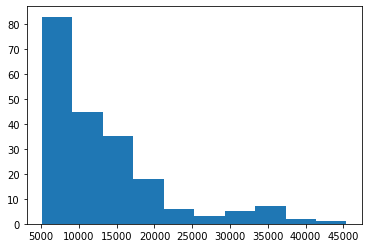

In [18]:
plt.hist(car_df['price'])

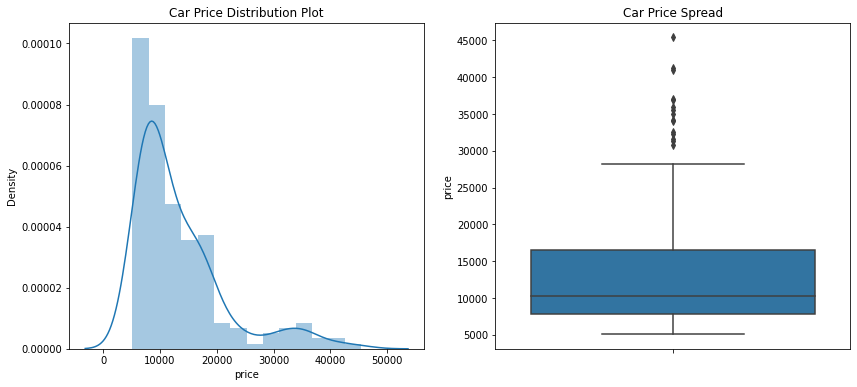

In [19]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(car_df.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=car_df.price)

plt.show()

This shows that our target variable is **not** normally distributed and it is right-skewed.
Also it has some outliers. Thus, we'll winsorize our target variable.
We'll try taking log of it also.

# Winsorizing Car Prices

(array([29., 44., 31., 16., 17.,  8., 18., 15.,  1., 26.]),
 array([ 5118. ,  6868.7,  8619.4, 10370.1, 12120.8, 13871.5, 15622.2,
        17372.9, 19123.6, 20874.3, 22625. ]),
 <a list of 10 Patch objects>)

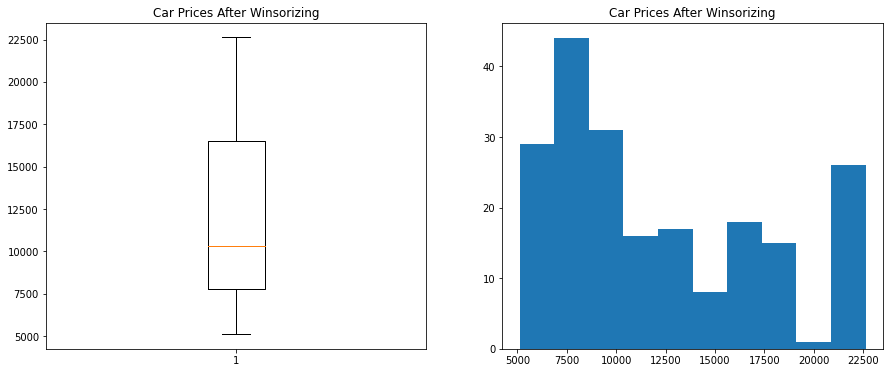

In [20]:
from scipy.stats.mstats import winsorize

winsorized_price = winsorize(np.array(car_df.price), (0, 0.1))

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.title("Car Prices After Winsorizing")
plt.boxplot(winsorized_price)

plt.subplot(122)
plt.title("Car Prices After Winsorizing")
plt.hist(winsorized_price)

In [21]:
# We got rid of the outliers but histogram shows that this is not a good feature to deal with.

# Log of Car Prices

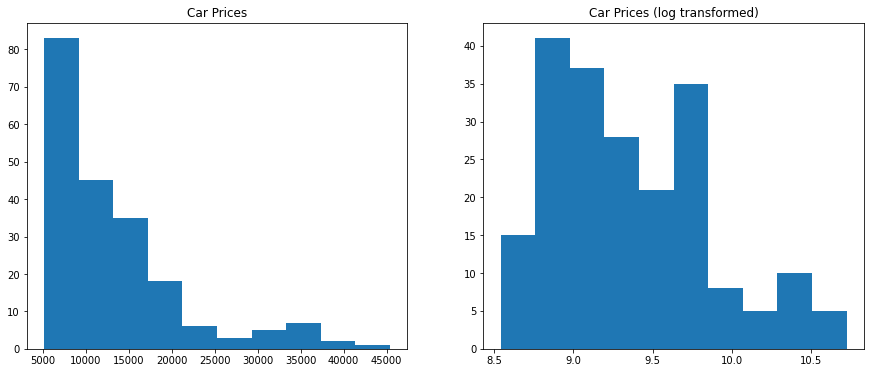

In [22]:
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
plt.hist(car_df["price"])
plt.title("Car Prices")

plt.subplot(1,2,2)
plt.hist(np.log(car_df["price"]))
plt.title("Car Prices (log transformed)")
plt.show()

In [23]:
# this didn't help us that much. Maybe it'll be better to take log of winsorized car prices;

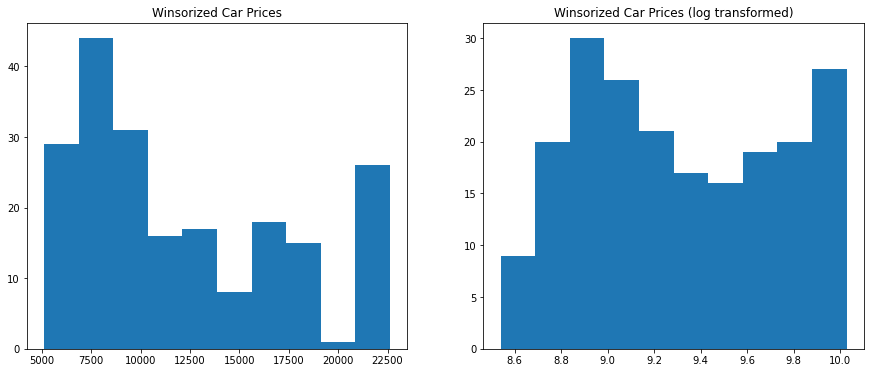

In [24]:
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
plt.hist(winsorized_price)
plt.title("Winsorized Car Prices")

plt.subplot(1,2,2)
plt.hist(np.log(winsorized_price))
plt.title("Winsorized Car Prices (log transformed)")
plt.show()

The last one looks somewhat similar to a U-shaped distribution. It would be pretty good if we had more data, that way we could get a normal distribution by the Central Limit Theorem.

# Jarque-Bera and Normal Dist. Tests

In [25]:
# let us create a test dataFrame
test_df = pd.DataFrame()
test_df['price'] = car_df['price'].to_numpy()
test_df['winsorized_price']=winsorize(np.array(car_df.price), (0, 0.1))
test_df['log_price'] = np.log(car_df["price"])
test_df

,price,winsorized_price,log_price
0,13495.000,13495.000,9.510
1,16500.000,16500.000,9.711
2,16500.000,16500.000,9.711
3,13950.000,13950.000,9.543
4,17450.000,17450.000,9.767
...,...,...,...
200,16845.000,16845.000,9.732
201,19045.000,19045.000,9.855
202,21485.000,21485.000,9.975
203,22470.000,22470.000,10.020


In [26]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = '{:.5f}'.format

variables = ['price','winsorized_price','log_price']
distribution_tests = pd.DataFrame(columns=['variable', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for variable in variables:
    jb_stats = jarque_bera(np.log(test_df[variable]))
    norm_stats = normaltest(np.log(test_df[variable]))
    distribution_tests = distribution_tests.append({"variable": variable,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
distribution_tests

,variable,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,price,15.71434,0.00039,14.10341,0.00087
1,winsorized_price,12.90436,0.00158,81.67516,0.00000
2,log_price,12.27734,0.00216,11.88046,0.00263


These tests show that all of their p-values are below 0.05, hence they are not normally distributed. Price is the worse, whereas log_price is the best in this case.

# Box-Cox Transformation on Car Prices

In [27]:
from scipy.stats import boxcox

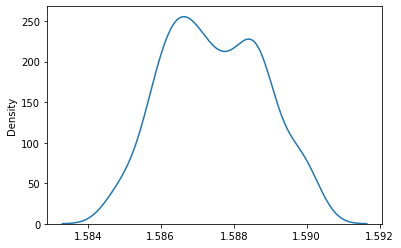

In [28]:
box_cox_price, b = boxcox(car_df['price'])
car_df['boxcox_price'] = box_cox_price

sns.distplot(box_cox_price, hist=False, kde=True) 

Now we have a better distribution, don't we?
Let us check that with Jarque-Bera and Normal tests.

In [29]:
test_df['box_cox_price'] = car_df['boxcox_price']


pd.options.display.float_format = '{:.5f}'.format

variables = ['price','winsorized_price','log_price', 'box_cox_price']
distribution_tests = pd.DataFrame(columns=['variable', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for variable in variables:
    jb_stats = jarque_bera(np.log(test_df[variable]))
    norm_stats = normaltest(np.log(test_df[variable]))
    distribution_tests = distribution_tests.append({"variable": variable,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
distribution_tests

,variable,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,price,15.71434,0.00039,14.10341,0.00087
1,winsorized_price,12.90436,0.00158,81.67516,0.00000
2,log_price,12.27734,0.00216,11.88046,0.00263
3,box_cox_price,6.20354,0.04497,16.72630,0.00023


So the J-B test's p- value is so close to the threshold value.
Hence we can use the price with box-cox transformation in our models.

# Correlation of Numerical Values

In [30]:
numerical_columns_df = car_df.select_dtypes(exclude='object')

In [31]:
numerical_columns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   wheelbase         205 non-null    float64
 2   carlength         205 non-null    float64
 3   carwidth          205 non-null    float64
 4   carheight         205 non-null    float64
 5   curbweight        205 non-null    int64  
 6   enginesize        205 non-null    int64  
 7   boreratio         205 non-null    float64
 8   stroke            205 non-null    float64
 9   compressionratio  205 non-null    float64
 10  horsepower        205 non-null    int64  
 11  peakrpm           205 non-null    int64  
 12  citympg           205 non-null    int64  
 13  highwaympg        205 non-null    int64  
 14  price             205 non-null    float64
 15  boxcox_price      205 non-null    float64
dtypes: float64(9), int64(7)
memory usage: 25.8 K

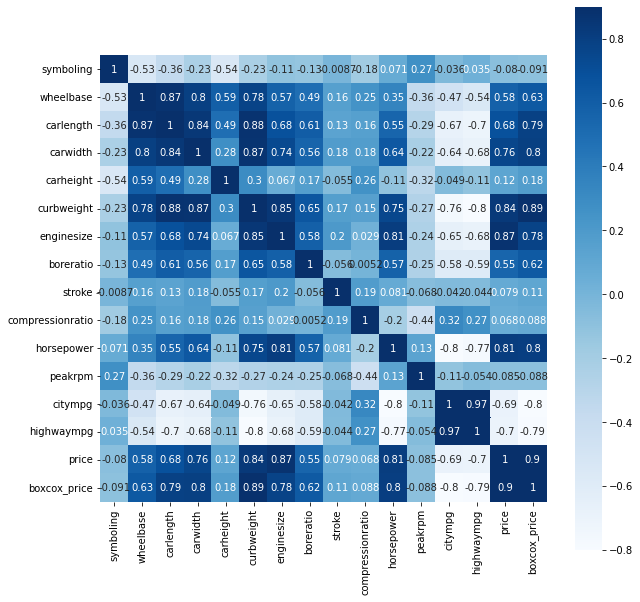

In [32]:
corr = numerical_columns_df.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True, annot=True)

In [33]:
# this heatmap shows that enginesize, curbweight, horsepower, carwidth, and the carlength
# are the most correlated features with car price.

# Some Observation on These Features

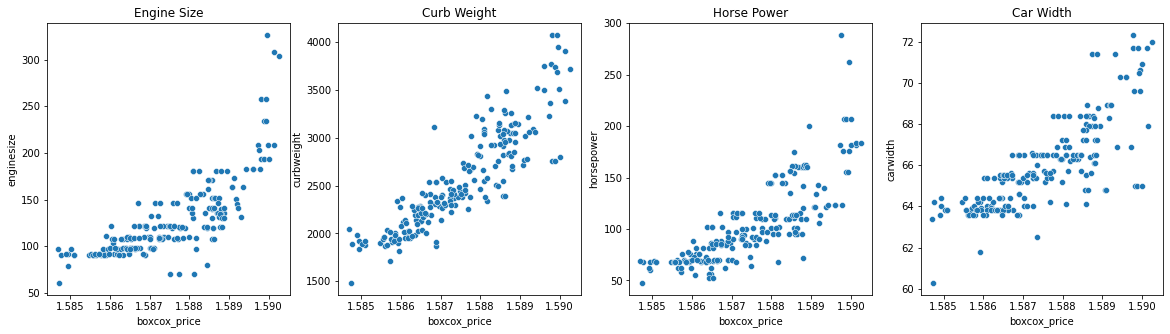

In [34]:
plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
sns.scatterplot(car_df["boxcox_price"], car_df["enginesize"])
plt.title("Engine Size")

plt.subplot(1,4,2)
sns.scatterplot(car_df["boxcox_price"], car_df["curbweight"])
plt.title("Curb Weight")

plt.subplot(1,4,3)
sns.scatterplot(car_df["boxcox_price"], car_df["horsepower"])
plt.title("Horse Power")

plt.subplot(1,4,4)
sns.scatterplot(car_df["boxcox_price"], car_df["carwidth"])
plt.title("Car Width")

plt.show()

# PCA on Numerical Features

In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [36]:
#dropping our target variable from numerical_columns before applying PCA
numerical_columns_df = numerical_columns_df.drop(columns='price', axis=1)
numerical_columns_df = numerical_columns_df.drop(columns='boxcox_price', axis=1)
numerical_columns_df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,88.60000,168.80000,64.10000,48.80000,2548,130,3.47000,2.68000,9.00000,111,5000,21,27
1,3,88.60000,168.80000,64.10000,48.80000,2548,130,3.47000,2.68000,9.00000,111,5000,21,27
2,1,94.50000,171.20000,65.50000,52.40000,2823,152,2.68000,3.47000,9.00000,154,5000,19,26
3,2,99.80000,176.60000,66.20000,54.30000,2337,109,3.19000,3.40000,10.00000,102,5500,24,30
4,2,99.40000,176.60000,66.40000,54.30000,2824,136,3.19000,3.40000,8.00000,115,5500,18,22


In [37]:
X = numerical_columns_df.values
len(numerical_columns_df.columns)

14

In [38]:
# Scaling of all numerical data
X = StandardScaler().fit_transform(numerical_columns_df)

In [39]:
# pca on all numerical data
pca = PCA(n_components=14)
principalComponents=pca.fit_transform(X)

In [40]:
exp_var = pca.explained_variance_ratio_
cumsum_var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(exp_var)
print(cumsum_var)

[0.48125521 0.18648546 0.09003325 0.06695639 0.04266764 0.03641421
 0.02952006 0.02209862 0.01855907 0.00904765 0.00666664 0.00526557
 0.00364343 0.00138681]
[ 48.13  66.78  75.78  82.48  86.75  90.39  93.34  95.55  97.41  98.31
  98.98  99.51  99.87 100.01]


In [41]:
#so we can have the 95.55% of the variance with only the first 8 variables.
#hence I'll drop the last 8 features which does not contribute to the variance.

In [42]:
# Scaling of all numerical data
X = StandardScaler().fit_transform(numerical_columns_df)

# pca on the first 8 components
pca = PCA(n_components=8)
principalComponents=pca.fit_transform(X)

In [43]:
exp_var= pca.explained_variance_ratio_
cumsum_var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(exp_var)
print(cumsum_var)

[0.48125521 0.18648546 0.09003325 0.06695639 0.04266764 0.03641421
 0.02952006 0.02209862]
[48.13 66.78 75.78 82.48 86.75 90.39 93.34 95.55]


Thus, first 4 principal components explain the 82.48% of the whole data.

# PCA on highly-correlated features only

In [44]:
corr_features = car_df[['enginesize','curbweight',
                       'horsepower','carwidth','carlength']]
corr_features

,enginesize,curbweight,horsepower,carwidth,carlength
0,130,2548,111,64.10000,168.80000
1,130,2548,111,64.10000,168.80000
2,152,2823,154,65.50000,171.20000
3,109,2337,102,66.20000,176.60000
4,136,2824,115,66.40000,176.60000
...,...,...,...,...,...
200,141,2952,114,68.90000,188.80000
201,141,3049,160,68.80000,188.80000
202,173,3012,134,68.90000,188.80000
203,145,3217,106,68.90000,188.80000


In [45]:
X = corr_features.values

In [46]:
X = StandardScaler().fit_transform(corr_features)
pca = PCA(n_components=5)
principalComponents=pca.fit_transform(X)

In [47]:
exp_var = pca.explained_variance_ratio_
cumsum_var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(exp_var)
print(cumsum_var)

[0.81066348 0.11039875 0.03515548 0.03033229 0.01345   ]
[ 81.07  92.11  95.63  98.66 100.01]


Text(0, 0.5, '% of Variance Explained')

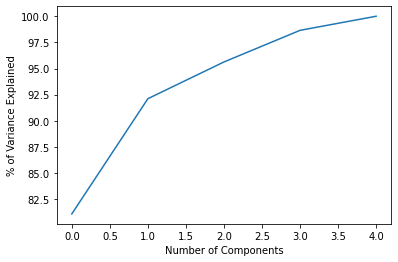

In [48]:
plt.plot(cumsum_var)
plt.xlabel('Number of Components')
plt.ylabel('% of Variance Explained')

In [49]:
#Hence PC1 and PC2 explains the 92.11% of the variance.

# Observations on Categorical Variables

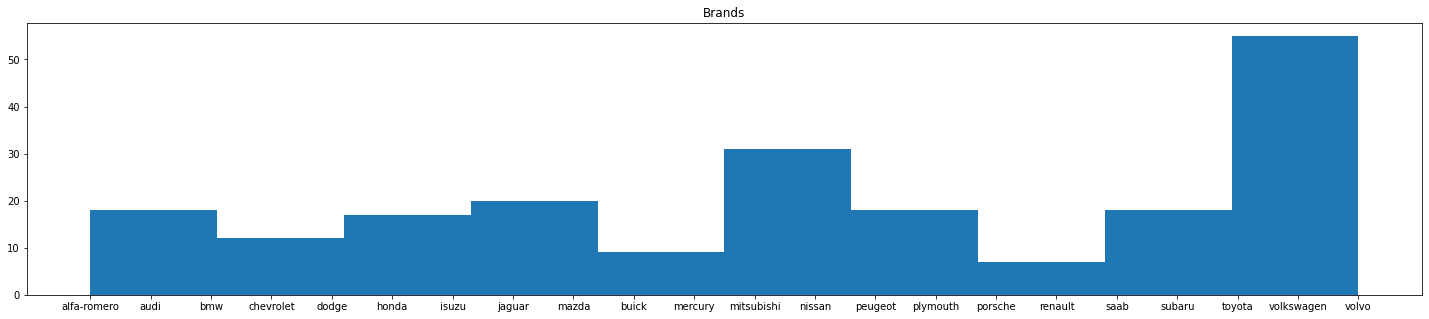

In [50]:
plt.figure(figsize=(25, 5))
plt.hist(car_df.BrandName)
plt.title('Brands')
plt.show()

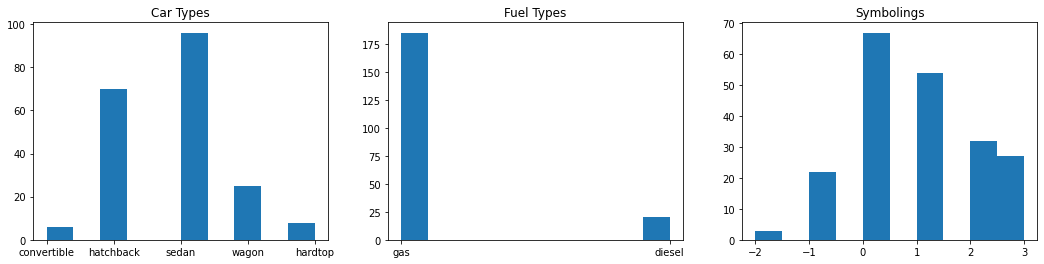

In [51]:
plt.figure(figsize=(18, 4))

plt.subplot(131)
plt.hist(car_df.carbody)
plt.title('Car Types')

plt.subplot(132)
plt.hist(car_df.fueltype)
plt.title('Fuel Types')

plt.subplot(133)
plt.hist(car_df.symboling)
plt.title('Symbolings')

plt.show()

<Figure size 1800x432 with 0 Axes>

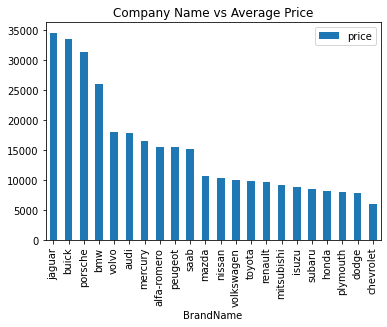

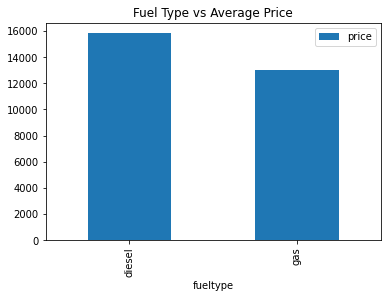

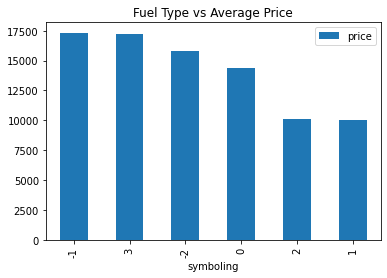

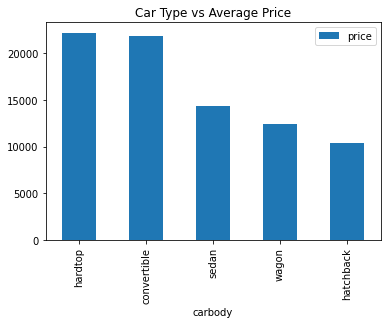

In [52]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(car_df.groupby(['BrandName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')

df = pd.DataFrame(car_df.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')

df = pd.DataFrame(car_df.groupby(['symboling'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')

df = pd.DataFrame(car_df.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

There aren't any difference about these features, only some of the companies are different than the others.
Hence, I won't deal with these categorical features anymore.

# Feature Engineering

In [53]:
corr_features['enginesize*curbweight'] = corr_features['enginesize'] * corr_features['curbweight']
corr_features['cararea'] = numerical_columns_df['carwidth'] * numerical_columns_df['carlength'] 
corr_features['carvolume'] = numerical_columns_df['carwidth'] * numerical_columns_df['carlength'] * numerical_columns_df['carlength']
corr_features['boxcox_price'] = car_df['boxcox_price']
corr_features.corr()

,enginesize,curbweight,horsepower,carwidth,carlength,enginesize*curbweight,cararea,carvolume,boxcox_price
enginesize,1.00000,0.85059,0.80977,0.73543,0.68336,0.98340,0.72903,0.72045,0.77985
curbweight,0.85059,1.00000,0.75074,0.86703,0.87773,0.90435,0.90681,0.90088,0.88837
horsepower,0.80977,0.75074,1.00000,0.64073,0.55262,0.79113,0.59956,0.57973,0.80315
carwidth,0.73543,0.86703,0.64073,1.00000,0.84112,0.78671,0.92647,0.90036,0.79513
carlength,0.68336,0.87773,0.55262,0.84112,1.00000,0.73623,0.98235,0.98990,0.79150
enginesize*curbweight,0.98340,0.90435,0.79113,0.78671,0.73623,1.00000,0.78487,0.77862,0.79985
cararea,0.72903,0.90681,0.59956,0.92647,0.98235,0.78487,1.00000,0.99728,0.81898
carvolume,0.72045,0.90088,0.57973,0.90036,0.98990,0.77862,0.99728,1.00000,0.80649
boxcox_price,0.77985,0.88837,0.80315,0.79513,0.79150,0.79985,0.81898,0.80649,1.00000


By using cararea, I'll deduce carwidth & carlength on the model.

{'boxes': [<matplotlib.lines.Line2D at 0x7f4fc723afd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f4fc71c2fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4fc71d2050>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4fc71cbad0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4fc71c2550>,
  <matplotlib.lines.Line2D at 0x7f4fc71c2a90>]}

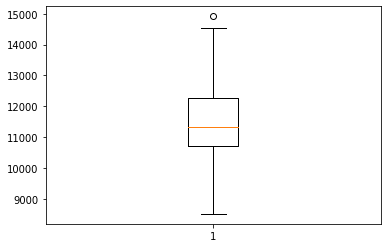

In [54]:
plt.boxplot(corr_features.cararea)

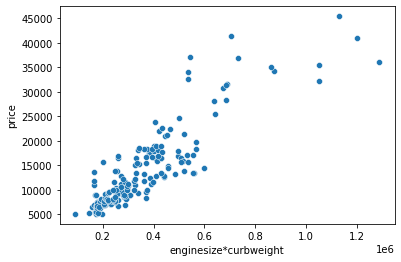

In [55]:
sns.scatterplot(corr_features['enginesize*curbweight'], car_df.price)

{'boxes': [<matplotlib.lines.Line2D at 0x7f4fc712c490>],
 'caps': [<matplotlib.lines.Line2D at 0x7f4fc7132450>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4fc7139490>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4fc7132f10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4fc712c990>,
  <matplotlib.lines.Line2D at 0x7f4fc712ced0>]}

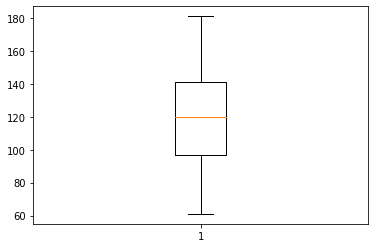

In [56]:
#Winsorization of the enginesize
winsorizing_enginesize= winsorize(np.array(car_df.enginesize), (0, 0.1))
plt.boxplot(winsorizing_enginesize)

In [57]:
corr_features['winsorized_enginesize'] = pd.DataFrame(winsorizing_enginesize)
corr_features['winsorized_enginesize'].head(5)

0    130
1    130
2    152
3    109
4    136
Name: winsorized_enginesize, dtype: int64

In [58]:
corr_features.corr()

,enginesize,curbweight,horsepower,carwidth,carlength,enginesize*curbweight,cararea,carvolume,boxcox_price,winsorized_enginesize
enginesize,1.00000,0.85059,0.80977,0.73543,0.68336,0.98340,0.72903,0.72045,0.77985,0.91379
curbweight,0.85059,1.00000,0.75074,0.86703,0.87773,0.90435,0.90681,0.90088,0.88837,0.86003
horsepower,0.80977,0.75074,1.00000,0.64073,0.55262,0.79113,0.59956,0.57973,0.80315,0.80395
carwidth,0.73543,0.86703,0.64073,1.00000,0.84112,0.78671,0.92647,0.90036,0.79513,0.73007
carlength,0.68336,0.87773,0.55262,0.84112,1.00000,0.73623,0.98235,0.98990,0.79150,0.70639
enginesize*curbweight,0.98340,0.90435,0.79113,0.78671,0.73623,1.00000,0.78487,0.77862,0.79985,0.87886
cararea,0.72903,0.90681,0.59956,0.92647,0.98235,0.78487,1.00000,0.99728,0.81898,0.73799
carvolume,0.72045,0.90088,0.57973,0.90036,0.98990,0.77862,0.99728,1.00000,0.80649,0.72501
boxcox_price,0.77985,0.88837,0.80315,0.79513,0.79150,0.79985,0.81898,0.80649,1.00000,0.81981
winsorized_enginesize,0.91379,0.86003,0.80395,0.73007,0.70639,0.87886,0.73799,0.72501,0.81981,1.00000


Winsorization on enginesize helped us to get a better feature.

In [59]:
numerical_columns_df['winsorized_enginesize'] = corr_features['winsorized_enginesize']
numerical_columns_df['cararea'] = corr_features['cararea']

# Creating the 1st Linear Reg Model

In [60]:
Y = car_df['boxcox_price']

X = numerical_columns_df[['symboling', 'cararea', 'carheight','curbweight','enginesize','boreratio','horsepower']]

lrm = linear_model.LinearRegression()

lrm.fit(X, Y)

print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [ 7.80218943e-05  2.95449677e-07  5.70109855e-06  1.24334775e-06
 -3.92543782e-06  1.13137097e-04  1.25874438e-05]

Intercept: 
 1.5793362571422298


In [61]:
import statsmodels.api as sm

# We need to add constant manually 
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           boxcox_price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     157.5
Date:                Sat, 08 Jan 2022   Prob (F-statistic):           4.05e-77
Time:                        22:47:23   Log-Likelihood:                 1258.5
No. Observations:                 205   AIC:                            -2501.
Df Residuals:                     197   BIC:                            -2474.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5793      0.001   1372.712      0.000       1.577       1.582
symboling   7.802e-05   3.64e-05      2.141      0.033    6.16e-06       0.000
cararea     2.954e-07   8.59e-08      3.441      0.001    1.26e-07    4.65e-07
carheight   5.701e-06   2.15e-05      0.265      0.792   -3.68e-05    4.82e-05
curbweight  1.243e-06   2.39e-07      5.200      0.000    7.72e-07    1.71e-06
enginesize -3.925e-06   1.98e-06     -1.978      0.049   -7.84e-06    -1.1e-08
boreratio      0.0001      0.000      0.612      0.542      -0.000       0.000
horsepower  1.259e-05   1.87e-06      6.732      0.000     8.9e-06    1.63e-05
==============================================================================
Omnibus:                        7.308   Durbin-Watson:                   0.938
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                7.310
Skew:                           0.373   Prob(JB):                       0.0259
Kurtosis:                       3.547   Cond. No.                     3.67e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Our R^2 value is pretty good.
P values of carheight and boreratio are higher than our threshold value, 0.05.
So it may be better to drop them in the next model.**

# 2nd Linear Reg Model

In [62]:
Y = car_df['boxcox_price']

X = numerical_columns_df[['symboling', 'cararea', 'curbweight','enginesize','horsepower']]

lrm = linear_model.LinearRegression()

lrm.fit(X, Y)

print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [ 7.41804907e-05  3.07348603e-07  1.26588572e-06 -4.00656594e-06
  1.26399879e-05]

Intercept: 
 1.5798329403318607


In [63]:
import statsmodels.api as sm

# We need to add constant manually 
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           boxcox_price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     222.1
Date:                Sat, 08 Jan 2022   Prob (F-statistic):           2.28e-79
Time:                        22:47:23   Log-Likelihood:                 1258.3
No. Observations:                 205   AIC:                            -2505.
Df Residuals:                     199   BIC:                            -2485.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5798      0.001   2789.835      0.000       1.579       1.581
symboling   7.418e-05   3.39e-05      2.188      0.030    7.32e-06       0.000
cararea     3.073e-07   8.18e-08      3.756      0.000    1.46e-07    4.69e-07
curbweight  1.266e-06   2.35e-07      5.377      0.000    8.02e-07    1.73e-06
enginesize -4.007e-06   1.95e-06     -2.052      0.042   -7.86e-06   -1.55e-07
horsepower  1.264e-05   1.76e-06      7.195      0.000    9.18e-06    1.61e-05
==============================================================================
Omnibus:                        8.274   Durbin-Watson:                   0.939
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.403
Skew:                           0.405   Prob(JB):                       0.0150
Kurtosis:                       3.572   Cond. No.                     1.81e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Our R^2 value did not dropped, and our Adjusted R^2 value is increased. That means we're better in terms of preventing overfitting now.
Also, this is a nested model of the first one and our F-statistic value has increased. That means, we're in the right path.**

# Multicollinearity

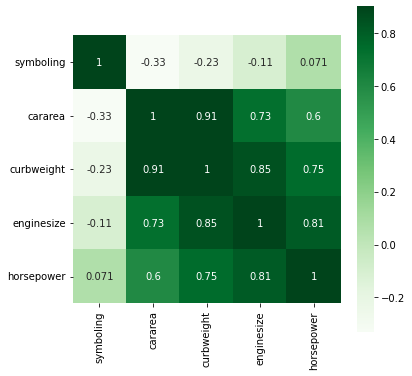

In [64]:
mc_check = numerical_columns_df[['symboling', 'cararea', 'curbweight','enginesize','horsepower']]

mc_check.corr()

plt.subplots(figsize=(6,6))
sns.heatmap(mc_check.corr(), vmax=0.9, cmap="Greens", square=True, annot=True)

In [65]:
mc_check.corr() 

,symboling,cararea,curbweight,enginesize,horsepower
symboling,1.00000,-0.33220,-0.22769,-0.10579,0.07087
cararea,-0.33220,1.00000,0.90681,0.72903,0.59956
curbweight,-0.22769,0.90681,1.00000,0.85059,0.75074
enginesize,-0.10579,0.72903,0.85059,1.00000,0.80977
horsepower,0.07087,0.59956,0.75074,0.80977,1.00000


In [66]:
# hence enginesize, horsepower, and curbweight are highly-correlated.
# thus it'll be better to drop one of them to prevent multicollinearity.

# Our Last Regression Model

In [141]:
Y = car_df['boxcox_price']

X = numerical_columns_df[['cararea', 'horsepower']]

lrm = linear_model.LinearRegression()

lrm.fit(X, Y)

print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [6.12150391e-07 1.65580260e-05]

Intercept: 
 1.578710278888948


In [142]:
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           boxcox_price   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     469.0
Date:                Sat, 08 Jan 2022   Prob (F-statistic):           1.23e-76
Time:                        23:06:58   Log-Likelihood:                 1242.5
No. Observations:                 205   AIC:                            -2479.
Df Residuals:                     202   BIC:                            -2469.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5787      0.000   3666.860      0.000       1.578       1.580
cararea     6.122e-07    4.3e-08     14.237      0.000    5.27e-07    6.97e-07
horsepower  1.656e-05   1.26e-06     13.168      0.000    1.41e-05     1.9e-05
==============================================================================
Omnibus:                        5.501   Durbin-Watson:                   1.104
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                5.182
Skew:                           0.330   Prob(JB):                       0.0750
Kurtosis:                       3.414   Cond. No.                     1.25e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We've made a little trade-off on the R^2 values, but still we have good R^2 values.
Also our F values doubled itself. Hence the latter model is superior than the former one.

# Splitting & Overfitting Check

In [70]:
"""
Recall our last model with 2 features;
Y = numerical_columns_df['boxcox_price']
X = numerical_columns_df[['cararea','horsepower']]
"""

"\nRecall our last model with 2 features;\nY = numerical_columns_df['boxcox_price']\nX = numerical_columns_df[['cararea','horsepower']]\n"

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.09, random_state = 42)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 186
The number of observations in test set is 19


In [133]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)

LinearRegression()

In [134]:
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

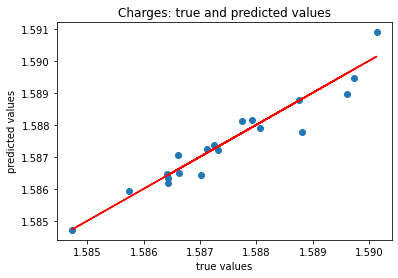

In [135]:
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

In [136]:
print("R-squared of the model in training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.8125532573562164
-----Test set statistics-----
R-squared of the model in test set is: 0.9155308915595066
Mean absolute error of the prediction is: 0.0002963518792722503
Mean squared error of the prediction is: 1.6226348351568044e-07
Root mean squared error of the prediction is: 0.0004028194179972962
Mean absolute percentage error of the prediction is: 0.01865987465864373


Our error metrics are close to awesome-ness.
One must see that our test set performed better than our training set in a way that we would not want. In other words, this splitting is underfitting if we're considering only R^2 values.

**Side Note:**
I just wanted to see the results of the upcoming 3 regression approaches. They're normally used to penalize overfitting.

# Ridge Regression

In [76]:
from sklearn.linear_model import Ridge

# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced.

ridgeregr = Ridge(alpha=10**37) 
ridgeregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridgeregr.predict(X_train)
y_preds_test = ridgeregr.predict(X_test)

print("R-squared of the model in training set is: {}".format(ridgeregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridgeregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.0
-----Test set statistics-----
R-squared of the model in test set is: -0.0015624889947978282
Mean absolute error of the prediction is: 0.001134757895385266
Mean squared error of the prediction is: 1.881473727820342e-06
Root mean squared error of the prediction is: 0.0013716682280421684
Mean absolute percentage error of the prediction is: 0.07147574206915601


In [145]:
values = [0,5,10,15,20,25,30,35]
results = list(map(lambda x: (10**x), values))

In [146]:
for alpha in results:
    ridgeregr = Ridge(alpha) 
    ridgeregr.fit(X_train, y_train)
    
    # We are making predictions here
    y_preds_train = ridgeregr.predict(X_train)
    y_preds_test = ridgeregr.predict(X_test)
    
    print("\n---------------NEW MODEL with alpha = {} ----------".format(alpha))
    print("R-squared of the model in training set is: {}".format(ridgeregr.score(X_train, y_train)))
    print("-------------Test set statistics----------")
    print("R-squared of the model in test set is: {}".format(ridgeregr.score(X_test, y_test)))
    print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
    print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
    print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
    print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))



---------------NEW MODEL with alpha = 1 ----------
R-squared of the model in training set is: 0.8125532573518919
-------------Test set statistics----------
R-squared of the model in test set is: 0.9155309464662471
Mean absolute error of the prediction is: 0.0002963516984676626
Mean squared error of the prediction is: 1.6226337804092005e-07
Root mean squared error of the prediction is: 0.0004028192870766245
Mean absolute percentage error of the prediction is: 0.018659863273368556

---------------NEW MODEL with alpha = 100000 ----------
R-squared of the model in training set is: 0.7938680455552489
-------------Test set statistics----------
R-squared of the model in test set is: 0.9080200606775082
Mean absolute error of the prediction is: 0.0003108157017224105
Mean squared error of the prediction is: 1.766916408090511e-07
Root mean squared error of the prediction is: 0.00042034704805559315
Mean absolute percentage error of the prediction is: 0.01956999976936561

---------------NEW MODEL 

So, as the alpha value increases, Ridge Regression is messing up the model.

# Lasso Regression

In [147]:
from sklearn.linear_model import Lasso

lassoregr = Lasso(alpha=10**20.5) 
lassoregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lassoregr.predict(X_train)
y_preds_test = lassoregr.predict(X_test)

print("R-squared of the model in training set is: {}".format(lassoregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lassoregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.0
-----Test set statistics-----
R-squared of the model in test set is: -0.00041964649398607
Mean absolute error of the prediction is: 0.0011316663327047137
Mean squared error of the prediction is: 1.9217863170889132e-06
Root mean squared error of the prediction is: 0.001386285077856973
Mean absolute percentage error of the prediction is: 0.07127670285317719


Again, it messed up the model. Let us try different alpha values in here as well.

In [148]:
for alpha in results:
    lassoregr = Lasso(alpha)
    lassoregr.fit(X_train, y_train)
    
    # We are making predictions here
    y_preds_train = lassoregr.predict(X_train)
    y_preds_test = lassoregr.predict(X_test)
    
    print("R-squared of the model in training set is: {}".format(lassoregr.score(X_train, y_train)))
    print("------------Test set statistics--------------")
    print("R-squared of the model in test set is: {}".format(lassoregr.score(X_test, y_test)))
    print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
    print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
    print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
    print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))
    print("\n---------------NEW MODEL-------------------")

R-squared of the model in training set is: 0.22021131983620368
------------Test set statistics--------------
R-squared of the model in test set is: 0.27335329634946937
Mean absolute error of the prediction is: 0.0009754217236104023
Mean squared error of the prediction is: 1.3958739188372653e-06
Root mean squared error of the prediction is: 0.0011814710825226596
Mean absolute percentage error of the prediction is: 0.06143561139385586

---------------NEW MODEL-------------------
R-squared of the model in training set is: 0.0
------------Test set statistics--------------
R-squared of the model in test set is: -0.00041964649398607
Mean absolute error of the prediction is: 0.0011316663327047137
Mean squared error of the prediction is: 1.9217863170889132e-06
Root mean squared error of the prediction is: 0.001386285077856973
Mean absolute percentage error of the prediction is: 0.07127670285317719

---------------NEW MODEL-------------------
R-squared of the model in training set is: 0.0
-----

It got worse faster than the Rigde Regression, unfortunately.

# ElasticNet Regression

In [149]:
from sklearn.linear_model import ElasticNet

elasticregr = ElasticNet(alpha=10**21, l1_ratio=0.5) 
elasticregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticregr.predict(X_train)
y_preds_test = elasticregr.predict(X_test)

print("R-squared of the model in training set is: {}".format(elasticregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(elasticregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.0
-----Test set statistics-----
R-squared of the model in test set is: -0.00041964649398607
Mean absolute error of the prediction is: 0.0011316663327047137
Mean squared error of the prediction is: 1.9217863170889132e-06
Root mean squared error of the prediction is: 0.001386285077856973
Mean absolute percentage error of the prediction is: 0.07127670285317719


Again, it messed up the model. Let us try different alpha values in here as well.

In [150]:
for alpha in results:
    elasticregr = ElasticNet(alpha, l1_ratio=0.5) 
    elasticregr.fit(X_train, y_train)

    # We are making predictions here
    y_preds_train = elasticregr.predict(X_train)
    y_preds_test = elasticregr.predict(X_test)
    
    print("\n---------------NEW MODEL-------------------")
    print("R-squared of the model in training set is: {}".format(elasticregr.score(X_train, y_train)))
    print("-----Test set statistics-----")
    print("R-squared of the model in test set is: {}".format(elasticregr.score(X_test, y_test)))
    print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
    print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
    print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
    print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


---------------NEW MODEL-------------------
R-squared of the model in training set is: 0.5448544352843256
-----Test set statistics-----
R-squared of the model in test set is: 0.6827769367708796
Mean absolute error of the prediction is: 0.0006575790156580526
Mean squared error of the prediction is: 6.093792185261924e-07
Root mean squared error of the prediction is: 0.0007806274518143673
Mean absolute percentage error of the prediction is: 0.04141616395020514

---------------NEW MODEL-------------------
R-squared of the model in training set is: 0.0
-----Test set statistics-----
R-squared of the model in test set is: -0.00041964649398607
Mean absolute error of the prediction is: 0.0011316663327047137
Mean squared error of the prediction is: 1.9217863170889132e-06
Root mean squared error of the prediction is: 0.001386285077856973
Mean absolute percentage error of the prediction is: 0.07127670285317719

---------------NEW MODEL-------------------
R-squared of the model in training set is:

Same thing goes for ElasticNet Regression

# Cross Validation

In [151]:
# Recall that our last model includes only 2 features, carwidth & horsepower
Y = car_df['boxcox_price']

X = numerical_columns_df[['cararea','horsepower']]

lrm = linear_model.LinearRegression()

lrm.fit(X, Y)

LinearRegression()

**K-Fold Cross Validation**

In [162]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=7, shuffle=True, random_state=1234)

In [153]:
pieces = kf.split(X)

for num, (train_index, test_index) in enumerate(pieces):
    print("No.{} Train set size : {}".format(num+1,len(train_index)))
    print("No.{} Test set size     : {}".format(num+1,len(test_index)))
    print('-'*28, "\n")

No.1 Train set size : 186
No.1 Test set size     : 19
---------------------------- 

No.2 Train set size : 186
No.2 Test set size     : 19
---------------------------- 

No.3 Train set size : 186
No.3 Test set size     : 19
---------------------------- 

No.4 Train set size : 186
No.4 Test set size     : 19
---------------------------- 

No.5 Train set size : 186
No.5 Test set size     : 19
---------------------------- 

No.6 Train set size : 186
No.6 Test set size     : 19
---------------------------- 

No.7 Train set size : 186
No.7 Test set size     : 19
---------------------------- 

No.8 Train set size : 187
No.8 Test set size     : 18
---------------------------- 

No.9 Train set size : 187
No.9 Test set size     : 18
---------------------------- 

No.10 Train set size : 187
No.10 Test set size     : 18
---------------------------- 

No.11 Train set size : 187
No.11 Test set size     : 18
---------------------------- 



In [163]:
from sklearn.metrics import mean_squared_error

pieces = kf.split(X)
score_list = []

for i, (train_indeks, test_indeks) in enumerate(pieces):
    X_train, y_train = X.loc[train_indeks], Y[train_indeks]
    X_test, y_test = X.loc[test_indeks], Y[test_indeks]
    
    lrm.fit(X_train, y_train)
    
    prediction = lrm.predict(X_test)
    
    score = lrm.score(X_test, y_test)  
    score_list.append(score)
    
    print("Piece No.{} score: {:.3f}".format(i+1, score))
    print("-"*23, "\n")

Piece No.1 score: 0.758
----------------------- 

Piece No.2 score: 0.901
----------------------- 

Piece No.3 score: 0.663
----------------------- 

Piece No.4 score: 0.802
----------------------- 

Piece No.5 score: 0.748
----------------------- 

Piece No.6 score: 0.828
----------------------- 

Piece No.7 score: 0.845
----------------------- 



Last splitting worked best, whereas the result of the last splitting were the worse.

In [164]:
print("Mean score : {:.2f}".format(np.mean(score_list)))

Mean score : 0.79


Our average R^2 values are pretty good.

**Cross Validation with cross_val_score() and cross_validate()**

In [165]:
from sklearn.model_selection import cross_validate, cross_val_score
cv = cross_validate(estimator=lrm,
                    X=X,
                    y=Y,
                    cv=7,
                    return_train_score=True,
                   )

print('Train Scores :', cv['train_score'], sep = '\n')
print("-"*50)
print('Test Scores     :', cv['test_score'], sep = '\n')

Train Scores :
[0.82596504 0.82079564 0.82050395 0.81889119 0.82706401 0.82263029
 0.82555566]
--------------------------------------------------
Test Scores     :
[0.79208308 0.79565778 0.81322614 0.85385823 0.79165344 0.63955027
 0.69967343]


**There are some over-fitting splittings, however, our general model did not perform that way.**

In [166]:
print('Mean score of train set : ', cv['train_score'].mean())
print('Mean score of test set  : ', cv['test_score'].mean())

Mean score of train set :  0.8230579696420246
Mean score of test set  :  0.7693860529223852


Test sets scores are close to training sets scores, but one can still improve them.

# Hyperparameter Tuning

**Grid Search**

In [137]:
from sklearn.model_selection import GridSearchCV

lrm.get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

In [180]:
Y = car_df['boxcox_price']

X = numerical_columns_df[['symboling', 'cararea', 'carheight','curbweight','enginesize','boreratio','horsepower']]

# define model
model = linear_model.LinearRegression()

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.09, random_state = 42)

parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=7)
grid.fit(X_train, y_train)
print ("r2 / variance : ", grid.best_score_)
print("Residual sum of squares: %.10f"
              % np.mean((grid.predict(X_test) - y_test) ** 2))

r2 / variance :  0.8181373562610953
Residual sum of squares: 0.0000001646


In [182]:
grid_cv = GridSearchCV(estimator=lrm,
                       param_grid = parameters,
                       cv = 7
                      )

grid_cv.fit(X, Y)

GridSearchCV(cv=7, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [183]:
print("Best Parameters : ", grid_cv.best_params_)
print("Best Score      : ", grid_cv.best_score_)

Best Parameters :  {'copy_X': True, 'fit_intercept': True, 'normalize': False}
Best Score      :  0.7723346777608405


In [208]:
results1 = grid_cv.cv_results_

df = pd.DataFrame(results1)
display(df.head().iloc[:,:6])
df.info()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_copy_X,param_fit_intercept
0,0.00266,0.00082,0.00176,0.00013,True,True
1,0.00238,0.00029,0.00167,0.00015,True,True
2,0.00234,0.00047,0.00174,0.00019,True,False
3,0.00204,0.00005,0.00164,0.00009,True,False
4,0.00253,0.00026,0.00169,0.00010,False,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   mean_fit_time        8 non-null      float64
 1   std_fit_time         8 non-null      float64
 2   mean_score_time      8 non-null      float64
 3   std_score_time       8 non-null      float64
 4   param_copy_X         8 non-null      object 
 5   param_fit_intercept  8 non-null      object 
 6   param_normalize      8 non-null      object 
 7   params               8 non-null      object 
 8   split0_test_score    8 non-null      float64
 9   split1_test_score    8 non-null      float64
 10  split2_test_score    8 non-null      float64
 11  split3_test_score    8 non-null      float64
 12  split4_test_score    8 non-null      float64
 13  split5_test_score    8 non-null      float64
 14  split6_test_score    8 non-null      float64
 15  mean_test_score      8 non-null      float64

In [186]:
df = df[['mean_test_score']]
df = df.sort_values(by='mean_test_score', ascending = False)
df

,mean_test_score
1,0.77233
5,0.77233
0,0.77233
4,0.77233
2,-2180.65744
3,-2180.65744
6,-2180.65744
7,-2180.65744


Grid Searching seems like non-sense for a linear regression model, isn't it?

# Recall Our Model & Do Some KNN

In [200]:
numerical_columns_df['box_cox_price'] = car_df['boxcox_price']
numerical_columns_df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,winsorized_enginesize,cararea,box_cox_price
0,3,88.60000,168.80000,64.10000,48.80000,2548,130,3.47000,2.68000,9.00000,111,5000,21,27,130,10820.08000,1.58810
1,3,88.60000,168.80000,64.10000,48.80000,2548,130,3.47000,2.68000,9.00000,111,5000,21,27,130,10820.08000,1.58858
2,1,94.50000,171.20000,65.50000,52.40000,2823,152,2.68000,3.47000,9.00000,154,5000,19,26,152,11213.60000,1.58858
3,2,99.80000,176.60000,66.20000,54.30000,2337,109,3.19000,3.40000,10.00000,102,5500,24,30,109,11690.92000,1.58818
4,2,99.40000,176.60000,66.40000,54.30000,2824,136,3.19000,3.40000,8.00000,115,5500,18,22,136,11726.24000,1.58870


In [202]:
# Creating the train and test sets

train , test = train_test_split(numerical_columns_df, test_size = 0.09)

x_train = train.drop(['box_cox_price'], axis=1)
y_train = train['box_cox_price']

x_test = test.drop(['box_cox_price'], axis = 1)
y_test = test['box_cox_price']

In [203]:
#Scaling the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [204]:
from math import sqrt

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.0007970075150719784
RMSE value for k=  2 is: 0.0007411133921048012
RMSE value for k=  3 is: 0.0006607664276152963
RMSE value for k=  4 is: 0.0005855159400734429
RMSE value for k=  5 is: 0.0005342030067796332
RMSE value for k=  6 is: 0.0005067503530579489
RMSE value for k=  7 is: 0.0005084471691548788
RMSE value for k=  8 is: 0.0005299754393755174
RMSE value for k=  9 is: 0.0005339792254088879
RMSE value for k=  10 is: 0.0005473522507619209
RMSE value for k=  11 is: 0.0005516582277306849
RMSE value for k=  12 is: 0.0005430826974200479
RMSE value for k=  13 is: 0.000554741734270756
RMSE value for k=  14 is: 0.0005612053202457631
RMSE value for k=  15 is: 0.0005675727014963886
RMSE value for k=  16 is: 0.0005495133721135469
RMSE value for k=  17 is: 0.0005426759412543888
RMSE value for k=  18 is: 0.0005381081671204997
RMSE value for k=  19 is: 0.0005386502979149427
RMSE value for k=  20 is: 0.000535386452390682


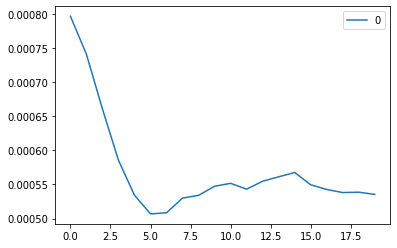

In [205]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

At k=5, we got our lowest RMSE value.

# Decision Tree

In [240]:
from sklearn.tree import DecisionTreeRegressor

Y = numerical_columns_df['box_cox_price']

X = numerical_columns_df[['symboling', 'carlength', 'carwidth', 'carheight','curbweight','enginesize','boreratio','horsepower']]

lrm = linear_model.LinearRegression()

lrm.fit(X, Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.09, random_state = 111)


In [231]:
dt_reg = DecisionTreeRegressor(max_depth=4)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [232]:
from sklearn.metrics import mean_squared_error as MSE
y_predict = dt_reg.predict(X_test)
mse_dt = MSE(y_predict, y_test)
rmse_ka = mse_dt**(1/2)

# Print rmse_dt
print("RMSE value of Decision Tree : {:.7f}".format(rmse_ka))

RMSE value of Decision Tree : 0.0004028


There is nearly no error in this approach.

In [233]:
from sklearn.tree import DecisionTreeRegressor

Y = numerical_columns_df['box_cox_price']

X = numerical_columns_df[['cararea','horsepower']]

lrm = linear_model.LinearRegression()

lrm.fit(X, Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.09, random_state = 111)


In [235]:
dt_reg = DecisionTreeRegressor(max_depth=4)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [236]:
from sklearn.metrics import mean_squared_error as MSE
y_predict = dt_reg.predict(X_test)
mse_dt = MSE(y_predict, y_test)
rmse_ka = mse_dt**(1/2)

# Print rmse_dt
print("RMSE value of Decision Tree : {:.7}".format(rmse_ka))

RMSE value of Decision Tree : 0.0004505294


There is nearly no error in this model either.

# Random Forest

In [242]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=10, random_state=2)
random_forest.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=10, random_state=2)

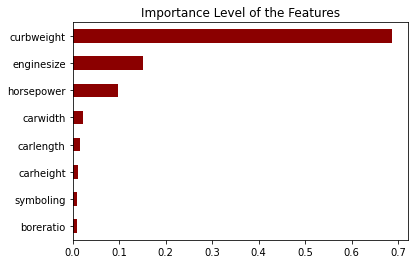

In [243]:
# feature importance for our general model
importance_level = pd.Series(data=random_forest.feature_importances_,
                        index= X_train.columns)

importance_level_sorted = importance_level.sort_values()

importance_level_sorted.plot(kind='barh', color='darkred')
plt.title('Importance Level of the Features')
plt.show()

In [244]:
#feature importance on our 2-feature model
Y = numerical_columns_df['box_cox_price']

X = numerical_columns_df[['cararea','horsepower']]

lrm = linear_model.LinearRegression()

lrm.fit(X, Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.09, random_state = 111)


In [245]:
random_forest = RandomForestRegressor(n_estimators=10, random_state=2)
random_forest.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=10, random_state=2)

In [246]:
y_prediction = random_forest.predict(X_test)
rmse_test = MSE(y_test, y_prediction)**(1/2)
print("RMSE value (Random Forest): {:.7f}".format(rmse_test))

RMSE value (Random Forest): 0.0003785


RMSE value of the Random Forest is strictly less than the RMSE value of the Decision Tree.

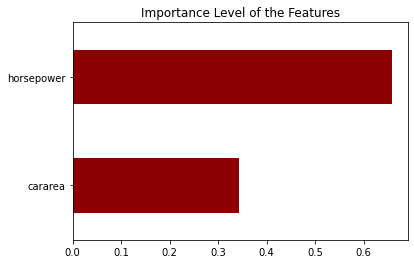

In [247]:
importance_level = pd.Series(data=random_forest.feature_importances_,
                        index= X_train.columns)

importance_level_sorted = importance_level.sort_values()

importance_level_sorted.plot(kind='barh', color='darkred')
plt.title('Importance Level of the Features')
plt.show()

# SVM with Original Car Prices

In [272]:
numerical_columns_df['price'] = car_df['price']

In [284]:
#Recall our very basic model
Y = numerical_columns_df['price']

X = numerical_columns_df[['symboling', 'carlength', 'carwidth', 'carheight','curbweight','enginesize','boreratio','horsepower']]

lrm = linear_model.LinearRegression()

lrm.fit(X, Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.09, random_state = 111)


In [285]:
from sklearn.svm import SVR
svr_reg = SVR(kernel='linear', C=1)
svr_reg.fit(X_train, y_train)
y_predict = svr_reg.predict(X_test)
rmse_test = MSE(y_test, y_predict)**(1/2)
print(" Value of RMSE (Kernel = linear): {:.7f}".format(rmse_test))

 Value of RMSE (Kernel = linear): 4126.1644054


In [286]:
svr_reg = SVR(kernel='poly', C=1)
svr_reg.fit(X_train, y_train)
y_predict = svr_reg.predict(X_test)
rmse_test = MSE(y_test, y_predict)**(1/2)
print(" Value of RMSE (Kernel = poly): {:.7f}".format(rmse_test))

 Value of RMSE (Kernel = poly): 12210.3814774


In [287]:
svr_reg = SVR(kernel='sigmoid', C=1)
svr_reg.fit(X_train, y_train)
y_predict = svr_reg.predict(X_test)
rmse_test = MSE(y_test, y_predict)**(1/2)
print(" Value of RMSE (Kernel = sigmoid): {:.7f}".format(rmse_test))

 Value of RMSE (Kernel = sigmoid): 12379.8373093


Since our target variable behaves as a linear function, linear kernel performed the best.

In [288]:
# With our last model
Y = numerical_columns_df['price']

X = numerical_columns_df[['cararea','horsepower']]

lrm = linear_model.LinearRegression()

lrm.fit(X, Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.09, random_state = 111)

In [289]:
svr_reg = SVR(kernel='linear', C=1)
svr_reg.fit(X_train, y_train)
y_predict = svr_reg.predict(X_test)
rmse_test = MSE(y_test, y_predict)**(1/2)
print(" Value of RMSE (Kernel = linear): {:.7f}".format(rmse_test))

 Value of RMSE (Kernel = linear): 5717.0444249


Our RMSE value got worsened than the former model

RMSE values with different kernels;

In [290]:
svr_reg = SVR(kernel='poly', C=1)
svr_reg.fit(X_train, y_train)
y_predict = svr_reg.predict(X_test)
rmse_test = MSE(y_test, y_predict)**(1/2)
print(" Value of RMSE (Kernel = poly): {:.7f}".format(rmse_test))

 Value of RMSE (Kernel = poly): 12271.3675003


In [291]:
svr_reg = SVR(kernel='sigmoid', C=1)
svr_reg.fit(X_train, y_train)
y_predict = svr_reg.predict(X_test)
rmse_test = MSE(y_test, y_predict)**(1/2)
print(" Value of RMSE (Kernel = sigmoid): {:.7f}".format(rmse_test))

 Value of RMSE (Kernel = sigmoid): 12377.6818480


However, these bad kernels' RMSE values are not so different than the previous model.

In [292]:
# Linear kernel with different Epsilon values;
epsil = [0.1, 0.3, 0.5, 0.7, 0.9, 1]

for eps in epsil:
    Y = numerical_columns_df['price']
    X = numerical_columns_df[['cararea','horsepower']]
    lrm = linear_model.LinearRegression()
    lrm.fit(X, Y)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.09, random_state = 111)
    
    svr_reg = SVR(kernel='linear', C=1, epsilon=eps)
    svr_reg.fit(X_train, y_train)
    y_predict = svr_reg.predict(X_test)
    rmse_test = MSE(y_test, y_predict)**(1/2)
    print(" Value of RMSE (Kernel = linear): {:.2f}".format(rmse_test))

 Value of RMSE (Kernel = linear): 5717.04
 Value of RMSE (Kernel = linear): 5716.88
 Value of RMSE (Kernel = linear): 5716.71
 Value of RMSE (Kernel = linear): 5716.54
 Value of RMSE (Kernel = linear): 5716.37
 Value of RMSE (Kernel = linear): 5716.29


Epsilon values didn't change our RMSE value that much. Maybe we can play with C values.

In [293]:
# Linear kernel with different C values;

values2 = [-3,-2,-1,0,1,2,3,4,5]
results2 = list(map(lambda x: (10**x), values2))

for c in results2:
    Y = numerical_columns_df['price']
    X = numerical_columns_df[['cararea','horsepower']]
    lrm = linear_model.LinearRegression()
    lrm.fit(X, Y)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.09, random_state = 111)
    
    svr_reg = SVR(kernel='linear', C=c)
    svr_reg.fit(X_train, y_train)
    y_predict = svr_reg.predict(X_test)
    rmse_test = MSE(y_test, y_predict)**(1/2)
    print(" Value of RMSE (Kernel = linear): {:.2f}".format(rmse_test))

 Value of RMSE (Kernel = linear): 7856.16
 Value of RMSE (Kernel = linear): 7247.16
 Value of RMSE (Kernel = linear): 5941.49
 Value of RMSE (Kernel = linear): 5717.04
 Value of RMSE (Kernel = linear): 5648.86
 Value of RMSE (Kernel = linear): 6817.06
 Value of RMSE (Kernel = linear): 54556.25
 Value of RMSE (Kernel = linear): 128101.89
 Value of RMSE (Kernel = linear): 2331115.57


As C value increases, our model gets worse.
We got our best result when C=1. If we had it when C=0, then we should have check for overfitting.

# SVM with Transformed Car Prices (box-cox transformation)

In [338]:
#Recall our very basic model
Y = numerical_columns_df['box_cox_price']

X = numerical_columns_df[['symboling', 'carlength', 'carwidth', 'carheight','curbweight','enginesize','boreratio','horsepower']]

lrm = linear_model.LinearRegression()

lrm.fit(X, Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.09, random_state = 111)


In [339]:
from sklearn.svm import SVR
svr_reg = SVR(kernel='linear', C=1)
svr_reg.fit(X_train, y_train)
y_predict = svr_reg.predict(X_test)
rmse_test = MSE(y_test, y_predict)**(1/2)
print(" Value of RMSE (Kernel = linear): {:.7f}".format(rmse_test))

 Value of RMSE (Kernel = linear): 0.0014644


RMSE value is so close to 0.
That is the power of transformation.

In [340]:
svr_reg = SVR(kernel='poly', C=1)
svr_reg.fit(X_train, y_train)
y_predict = svr_reg.predict(X_test)
rmse_test = MSE(y_test, y_predict)**(1/2)
print(" Value of RMSE (Kernel = poly): {:.7f}".format(rmse_test))

 Value of RMSE (Kernel = poly): 0.0014644


In [341]:
svr_reg = SVR(kernel='sigmoid', C=1)
svr_reg.fit(X_train, y_train)
y_predict = svr_reg.predict(X_test)
rmse_test = MSE(y_test, y_predict)**(1/2)
print(" Value of RMSE (Kernel = sigmoid): {:.7f}".format(rmse_test))

 Value of RMSE (Kernel = sigmoid): 0.0014644


Even these bad kernels had the same performance with linear kernel.

# XGBoost

In [301]:
!pip install xgboost

In [439]:
import xgboost as xgb
Y = numerical_columns_df['price']
X = numerical_columns_df[['symboling', 'carlength', 'carwidth', 'carheight','curbweight','enginesize','boreratio','horsepower']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=123)

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', seed=123)

In [440]:
xg_reg.fit(X_train,y_train)
y_predict = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print("RMSE: %f" % (rmse))

RMSE: 1407.952172


Our RMSE value has divided by 10, compared to other methods.
Recall that this used **"gbtree" as booster** as its set by default.

In [441]:
# XGBoost with "gblinear" booster

DM_train = xgb.DMatrix(data = X_train, label=y_train)
DM_test =  xgb.DMatrix(data = X_test, label=y_test)
params = {"booster":"gblinear", "objective":"reg:squarederror"}
xg_reg = xgb.train(dtrain=DM_train, params=params, num_boost_round=5)

In [442]:
y_predict_gblinear = xg_reg.predict(DM_test)
rmse = np.sqrt(mean_squared_error(y_test, y_predict_gblinear))
print("RMSE: %f" % (rmse))

RMSE: 5839.084636


It performed very poorly, compared to other models.

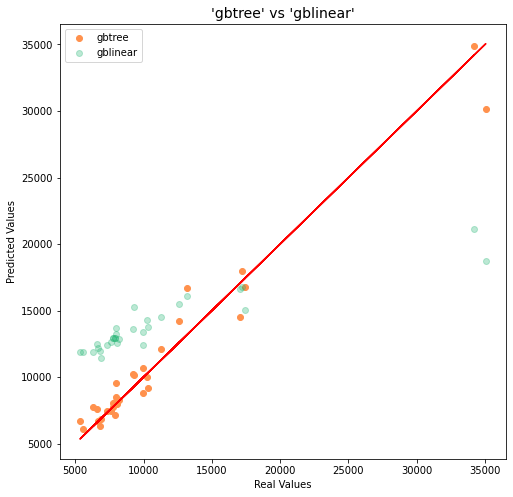

In [443]:
plt.figure(figsize=(8,8))
plt.title("'gbtree' vs 'gblinear'", size = 14)
ax1 = plt.scatter(y_test, y_predict, color = '#FF914D')
ax2 = plt.scatter(y_test, y_predict_gblinear, color='#22B573', alpha=0.30)
ax3 = plt.plot(y_test, y_test, color="red")
plt.legend((ax1, ax2), ('gbtree', 'gblinear'))
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.show()

# Cross Validation with XGBoost

In [401]:
# cross val with 7-folds
car_prices_dmatrix = xgb.DMatrix(data=X, label=Y)
params = {"objective":"reg:squarederror", "max_depth":4}
car_prices_cv = xgb.cv(dtrain=car_prices_dmatrix, params=params, nfold=7, 
                    num_boost_round=100, early_stopping_rounds = 5, metrics="rmse", as_pandas=True, seed=123)
display(car_prices_cv.sort_values(by='test-rmse-mean').head(5))

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
14,977.00353,51.25653,2183.43502,545.88833
13,1031.34093,53.74630,2211.82640,556.97245
12,1096.11265,58.26300,2221.26955,567.29884
11,1172.62802,60.73494,2263.06006,570.88902
10,1271.60284,61.20104,2290.83409,563.69453


We got the best result in the 14th iteration.

In [402]:
#checking MAE's
car_prices_cv = xgb.cv(dtrain=car_prices_dmatrix, params=params, nfold=4, 
                    num_boost_round=100, early_stopping_rounds = 5, metrics="mae", as_pandas=True, seed=123)
display(car_prices_cv.sort_values(by='test-mae-mean').head(5))

,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
39,301.39562,26.70380,1402.68356,286.55178
38,311.47907,27.88803,1403.01564,282.46776
37,318.37748,26.76634,1405.22643,283.01767
32,371.53788,27.49197,1405.71927,285.85952
35,332.69991,27.24477,1406.17337,280.45750


# Regularization with XGBoost

In [403]:
car_prices_dmatrix = xgb.DMatrix(data=X, label=Y)

l1_params = np.arange(0.01, 0.2, 0.01)
params = {"objective":"reg:squarederror","max_depth":4}
rmses_l1 = []
for alpha in l1_params:
    params["alpha"] = alpha
    cv_rmse = xgb.cv(dtrain=car_prices_dmatrix, params=params, nfold=7, num_boost_round=100, 
                             metrics="rmse", as_pandas=True, early_stopping_rounds=10, seed=123)
    rmses_l1.append(cv_rmse["test-rmse-mean"].tail(1).values[0])

In [404]:
print("Best 11 values:")
best_values = pd.DataFrame(list(zip(l1_params, rmses_l1)), columns=["l1", "rmse"])
display(best_values.sort_values('rmse').head())

Best 11 values:


,l1,rmse
18,0.19000,2143.94142
17,0.18000,2143.94160
16,0.17000,2143.94193
15,0.16000,2143.94195
14,0.15000,2143.94247


Our model produces the most accurate result when alpha is 0.19.

# Hyperparameter Tuning in XGBoost

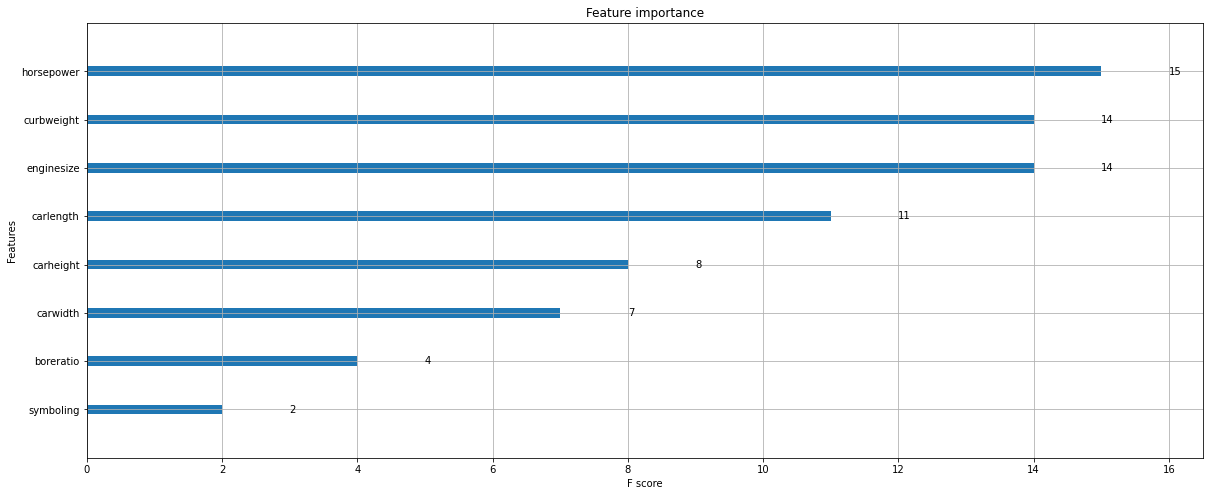

In [405]:
Y = numerical_columns_df['price']
X = numerical_columns_df[['symboling', 'carlength', 'carwidth', 'carheight','curbweight','enginesize','boreratio','horsepower']]

car_prices_dmatrix = xgb.DMatrix(data=X, label=Y)

best_parameters = {'objective':'reg:squarederror',
                       'colsample_bytree': 0.7, 
                       'gamma': 0.1, 
                       'learning_rate': 0.3, 
                       'max_depth': 4, 
                       'min_child_weight': 3
                      }

car_prices_model = xgb.train(params=best_parameters, dtrain=car_prices_dmatrix, num_boost_round=10)

ax = xgb.plot_importance(car_prices_model)
ax.figure.set_size_inches(20,8)
plt.show()

Horsepower is the most important feature in this model.

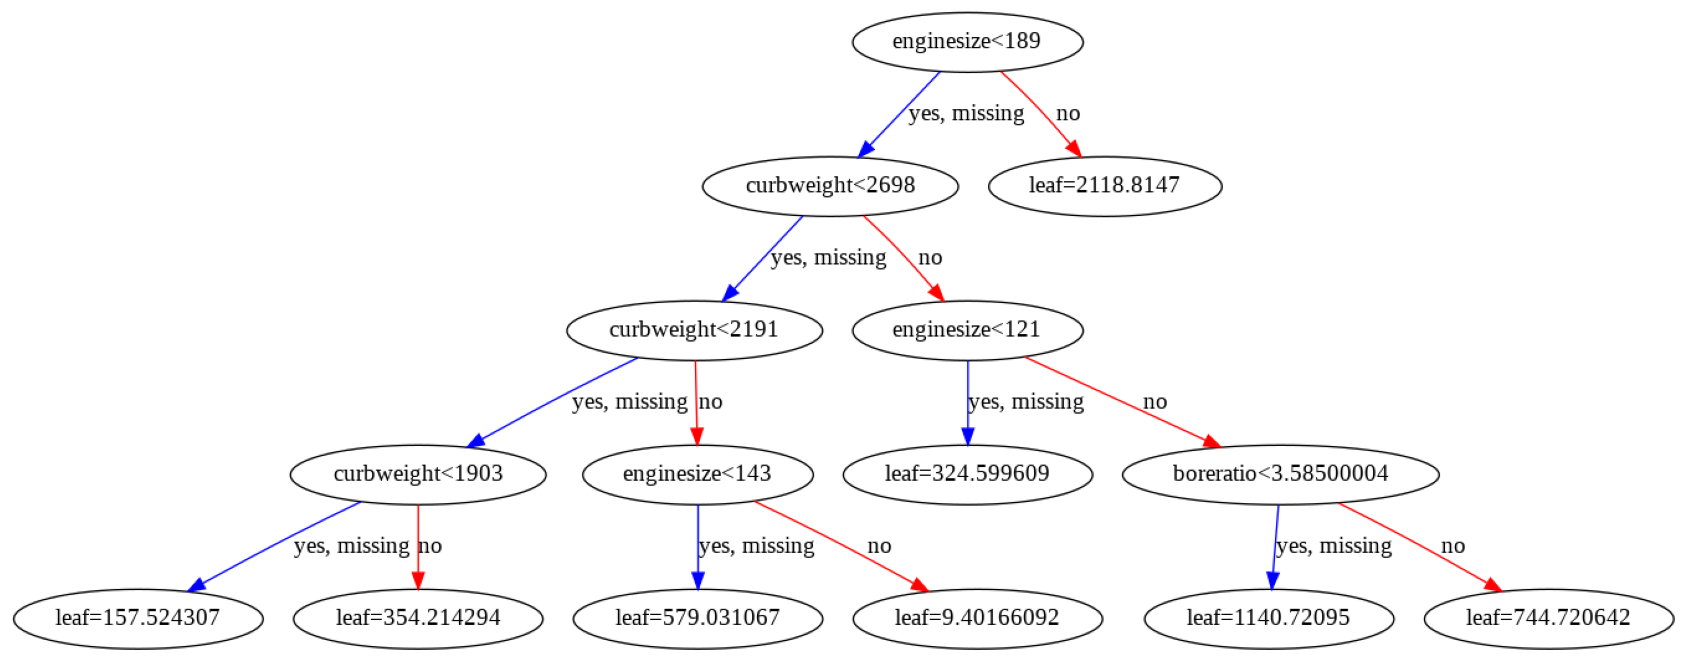

In [380]:
ax1 = xgb.plot_tree(car_prices_model, num_trees=5)
ax1.figure.set_size_inches(30,30)
plt.show()

# XGBoost On Our Last Model

In [444]:
Y = numerical_columns_df['box_cox_price']
X = numerical_columns_df[['cararea','horsepower']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=123)

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', seed=123)

In [445]:
xg_reg.fit(X_train,y_train)
y_predict = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print("RMSE: %f" % (rmse))

RMSE: 0.000430


RMSE value has decreased to an unbelievable value.
Let us apply another booster;

In [446]:
# XGBoost with "gblinear" booster

DM_train = xgb.DMatrix(data = X_train, label=y_train)
DM_test =  xgb.DMatrix(data = X_test, label=y_test)
params = {"booster":"gblinear", "objective":"reg:squarederror"}
xg_reg = xgb.train(dtrain=DM_train, params=params, num_boost_round=5)

In [447]:
y_predict_gblinear = xg_reg.predict(DM_test)
rmse = np.sqrt(mean_squared_error(y_test, y_predict_gblinear))
print("RMSE: %f" % (rmse))

RMSE: 0.065329


It performed very poorly, compared to gbtree booster.

However, these RMSE values may tell us that there is an overfitting. Since they are far more than enough.

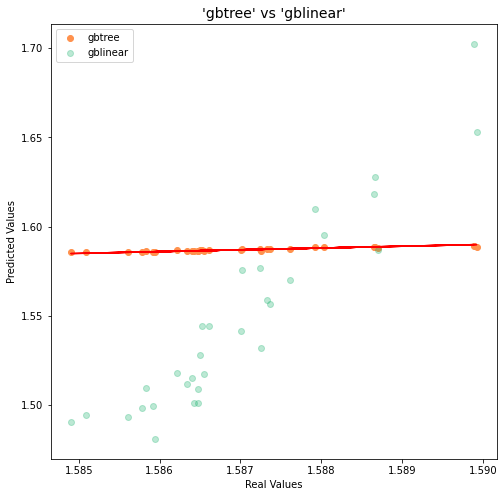

In [448]:
plt.figure(figsize=(8,8))
plt.title("'gbtree' vs 'gblinear'", size = 14)
ax1 = plt.scatter(y_test, y_predict, color = '#FF914D')
ax2 = plt.scatter(y_test, y_predict_gblinear, color='#22B573', alpha=0.30)
ax3 = plt.plot(y_test, y_test, color="red")
plt.legend((ax1, ax2), ('gbtree', 'gblinear'))
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.show()

This shows the preciness of 'gbtree' booster for this model.
It is still good to check the overfitting though.

# Cross Validation with XGBoost

In [421]:
# cross val with 7-folds
car_prices_dmatrix = xgb.DMatrix(data=X, label=Y)
params = {"objective":"reg:squarederror", "max_depth":4}
car_prices_cv = xgb.cv(dtrain=car_prices_dmatrix, params=params, nfold=7, 
                    num_boost_round=100, early_stopping_rounds = 5, metrics="rmse", as_pandas=True, seed=123)
display(car_prices_cv.sort_values(by='test-rmse-mean').head(5))

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
34,0.00044,0.00001,0.00051,0.00004
31,0.00044,0.00001,0.00051,0.00004
33,0.00044,0.00001,0.00051,0.00004
32,0.00044,0.00001,0.00051,0.00004
30,0.00044,0.00001,0.00051,0.00004


We got the best result in the 34th iteration.

In [422]:
#checking MAE's
car_prices_cv = xgb.cv(dtrain=car_prices_dmatrix, params=params, nfold=4, 
                    num_boost_round=100, early_stopping_rounds = 5, metrics="mae", as_pandas=True, seed=123)
display(car_prices_cv.sort_values(by='test-mae-mean').head(5))

,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
35,0.00035,0.00001,0.00040,0.00001
32,0.00035,0.00001,0.00040,0.00001
34,0.00035,0.00001,0.00040,0.00001
33,0.00035,0.00001,0.00040,0.00001
31,0.00035,0.00001,0.00040,0.00001


# Regularization with XGBoost

In [423]:
car_prices_dmatrix = xgb.DMatrix(data=X, label=Y)

l1_params = np.arange(0.01, 0.2, 0.01)
params = {"objective":"reg:squarederror","max_depth":4}
rmses_l1 = []
for alpha in l1_params:
    params["alpha"] = alpha
    cv_rmse = xgb.cv(dtrain=car_prices_dmatrix, params=params, nfold=7, num_boost_round=100, 
                             metrics="rmse", as_pandas=True, early_stopping_rounds=10, seed=123)
    rmses_l1.append(cv_rmse["test-rmse-mean"].tail(1).values[0])

In [389]:
print("Best 11 values:")
best_values = pd.DataFrame(list(zip(l1_params, rmses_l1)), columns=["l1", "rmse"])
display(best_values.sort_values('rmse').head())

Best 11 values:


,l1,rmse
0,0.01000,0.00059
1,0.02000,0.00067
2,0.03000,0.00072
3,0.04000,0.00079
4,0.05000,0.00084


Our model produces the most accurate result when alpha is 0.1.

Since we have 2 features in our model, it will not be meaningful to check the importance of our model.

# LightGBM

In [427]:
import lightgbm as lgb

In [434]:
Y = numerical_columns_df['price']
X = numerical_columns_df[['symboling', 'carlength', 'carwidth', 'carheight','curbweight','enginesize','boreratio','horsepower']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=0)

In [435]:
d_train = lgb.Dataset(X_train, label=y_train)

In [436]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmsle',
    'max_depth': 6, 
    'learning_rate': 0.1,
    'force_row_wise':True,
    'verbose': -1}
n_estimators = 100

In [437]:
lgb_reg_model = lgb.train(params, d_train, num_boost_round = 100)
y_predict = lgb_reg_model.predict(X_test)
y_predict_train = lgb_reg_model.predict(X_train)

rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print("RMSE: %f" % (rmse))

RMSE: 2513.223072


RMSE value is greater than the XGBoost's RMSE value here.

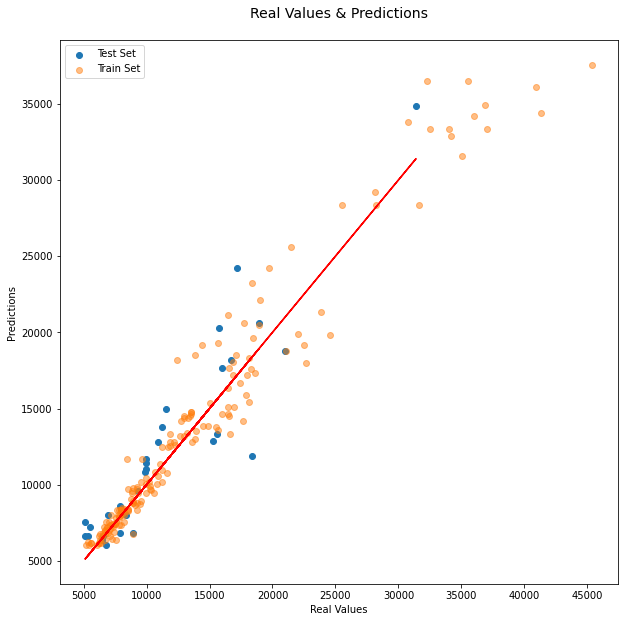

In [438]:
plt.figure(figsize=(10,10))
plt.title('Real Values & Predictions\n', size = 14)
ax1 = plt.scatter(y_test, y_predict)
ax2 = plt.scatter(y_train, y_predict_train,alpha=0.5)
ax3 = plt.plot(y_test, y_test, color="red")
plt.legend((ax1, ax2), ('Test Set', 'Train Set'))
plt.xlabel("Real Values")
plt.ylabel("Predictions")
plt.show()

# LightGBM on Our Last Model

In [449]:
Y = numerical_columns_df['box_cox_price']
X = numerical_columns_df[['cararea','horsepower']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=0)

In [450]:
d_train = lgb.Dataset(X_train, label=y_train)

In [451]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmsle',
    'max_depth': 6, 
    'learning_rate': 0.1,
    'force_row_wise':True,
    'verbose': -1}
n_estimators = 100

In [452]:
lgb_reg_model = lgb.train(params, d_train, num_boost_round = 100)
y_predict = lgb_reg_model.predict(X_test)
y_predict_train = lgb_reg_model.predict(X_train)

rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print("RMSE: %f" % (rmse))

RMSE: 0.000611


RMSE value is greater than the XGBoost's RMSE value here.

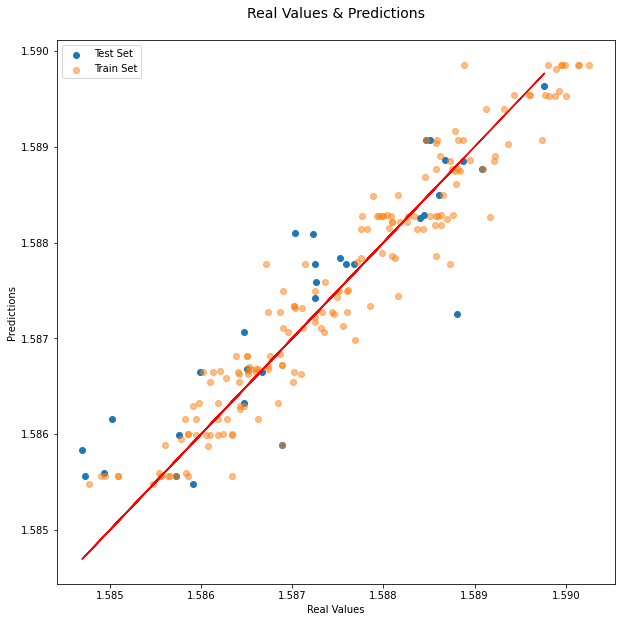

In [453]:
plt.figure(figsize=(10,10))
plt.title('Real Values & Predictions\n', size = 14)
ax1 = plt.scatter(y_test, y_predict)
ax2 = plt.scatter(y_train, y_predict_train,alpha=0.5)
ax3 = plt.plot(y_test, y_test, color="red")
plt.legend((ax1, ax2), ('Test Set', 'Train Set'))
plt.xlabel("Real Values")
plt.ylabel("Predictions")
plt.show()

We have an amazing RMSE value, and the graph shows a data scientist's dream. I guess, we can forget the 0.0002 RMSE value to get a graph like that, rather than the one in the XGBoost for the last model.

# Conclusion



*   Transforming the target variable to a normal distribution, and then scaling it to prevent our coefficients to be lesser and lesser is good to enhance the model in any way. 
*   PCA is always a good-to-have- tool to reduce the dimensions.
*   Cross-Validation helps us to examine the problems in splitted training sets and test sets.
*   Random Forest performed better than Decision Tree algorithm in general.
*   This is same for XGBoost & LightGBM methods, XGBoost performed better than LightGBM, in the world of metrics.
*   SVM works better for a scaled data, as expected. That is because, by scaling the data to a certain interval, it is easier to find some sub-intervals in that interval. 





